# welter
## Issue 51: Absolute Zero spots
### Part I: Try it out

In [1]:
import os
import json
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [3]:
%matplotlib inline

## Calculate minimum


Vmin is 13.1
Vmax is 12.6
dV = 0.5 mag

If max brightness has zero spots

In [4]:
f_rat1986 = 10**(-0.2/2.5)
f_rat2015 = 10**(-0.5/2.5)
f_rat2004 = 10**(-0.8/2.5)

In [5]:
f_spot = np.arange(0.0, 1.0, 0.0001)

$f_{rat} = (1-f_{spot}+f_{spot}x_{spot}^4)$  
$f_{spot}-f_{spot}x_{spot}^4 = (1-f_{rat})$  
$f_{spot}(1-x_{spot}^4) = (1-f_{rat})$  
$(1-x_{spot}^4) = (1-f_{rat})/f_{spot}$  
$x_{spot}^4 = 1-(1-f_{rat})/f_{spot}$  
$x_{spot} = (1-\frac{1-f_{rat}}{f_{spot}})^{1/4}$

This is assuming *all the flux comes out in $V-$band*.  Starspots are cooler, so this is necessarily false!

In [6]:
x_spot_2015 = (1-(1-f_rat2015)/f_spot)**(0.25)
x_spot_2004 = (1-(1-f_rat2004)/f_spot)**(0.25)
x_spot_1986 = (1-(1-f_rat1986)/f_spot)**(0.25)

In [7]:
sns.set_style('ticks')
sns.set_context('paper', font_scale=1.5)

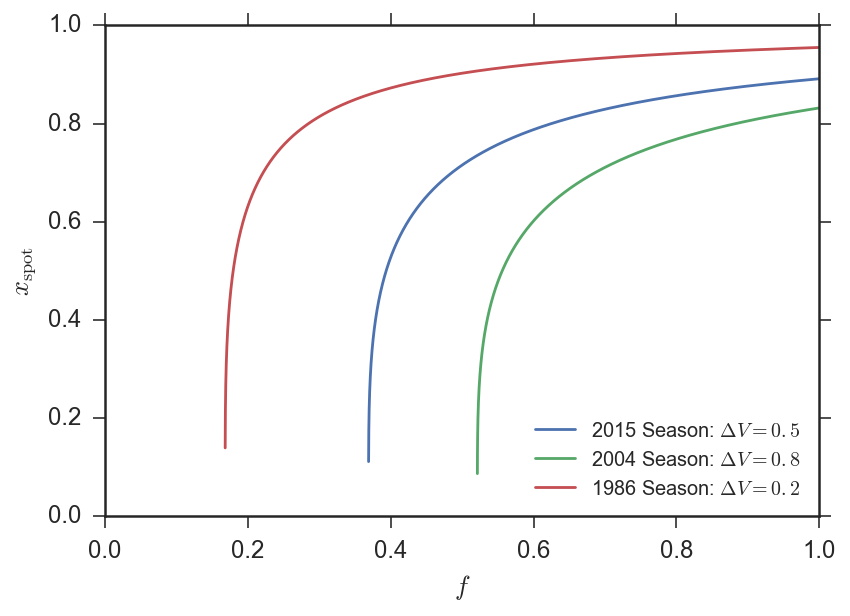

In [10]:
plt.plot(f_spot, x_spot_2015, label = '2015 Season: $\Delta V = 0.5$')
plt.plot(f_spot, x_spot_2004, label = '2004 Season: $\Delta V = 0.8$')
plt.plot(f_spot, x_spot_1986, label = '1986 Season: $\Delta V = 0.2$')
plt.xlabel('$f$')
plt.ylabel('$x_{\mathrm{spot}}$')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc='best', fontsize=10.0)

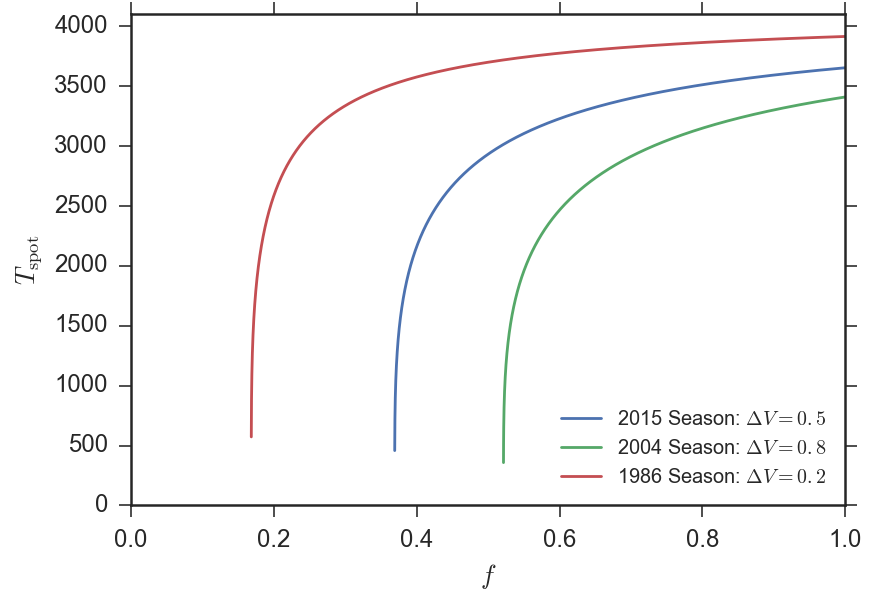

In [8]:
plt.plot(f_spot, x_spot_2015*4100, label = '2015 Season: $\Delta V = 0.5$')
plt.plot(f_spot, x_spot_2004*4100, label = '2004 Season: $\Delta V = 0.8$')
plt.plot(f_spot, x_spot_1986*4100, label = '1986 Season: $\Delta V = 0.2$')
plt.xlabel('$f$')
plt.ylabel('$T_{\mathrm{spot}}$')
plt.xlim(0,1)
plt.ylim(0,4100)
plt.legend(loc='best', fontsize=10.0)

In [ ]:
#plt.plot(f_spot, x_spot_2015*4100, label = '2015 Season: $\Delta V = 0.5$')
plt.vlines(0.37, 0, 4100, linestyles='dashed')
plt.hlines(3650, 0, 1, linestyles='dotted')
plt.fill_between([0, 0.37], [4100, 4100], color='r', alpha=0.3)
plt.fill_between([0, 1], [4100, 4100], [3650, 3650], color='b', alpha=0.3)
plt.xlabel('$f$')
plt.ylabel('$T_{\mathrm{spot}}$')
plt.xlim(0,1)
plt.ylim(0,4100)
plt.text(0.03, 2000, 'Excluded by \nabsolute zero spots', fontsize=12)
plt.text(0.45, 3750, 'Excluded by 100% filling factor', fontsize=12)

plt.legend(loc='best', fontsize=10.0)

//anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


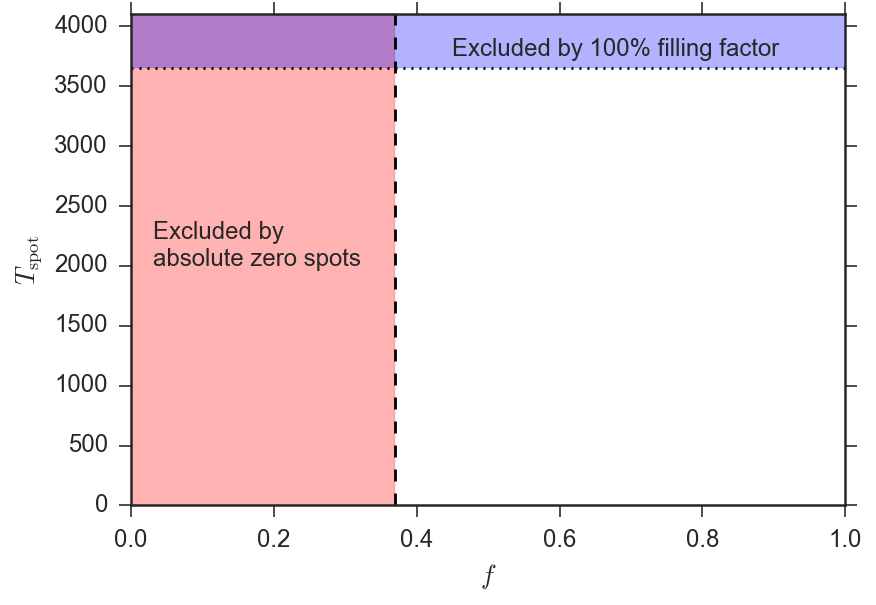

In [9]:
#plt.plot(f_spot, x_spot_2015*4100, label = '2015 Season: $\Delta V = 0.5$')
plt.vlines(0.37, 0, 4100, linestyles='dashed')
plt.hlines(3650, 0, 1, linestyles='dotted')
plt.fill_between([0, 0.37], [4100, 4100], color='r', alpha=0.3)
plt.fill_between([0, 1], [4100, 4100], [3650, 3650], color='b', alpha=0.3)
plt.xlabel('$f$')
plt.ylabel('$T_{\mathrm{spot}}$')
plt.xlim(0,1)
plt.ylim(0,4100)
plt.text(0.03, 2000, 'Excluded by \nabsolute zero spots', fontsize=12)
plt.text(0.45, 3750, 'Excluded by 100% filling factor', fontsize=12)

plt.legend(loc='best', fontsize=10.0)

In [90]:
x_spot[-1]*4100.0

3410.2305328316588

## Do the same thing but with Data

In [91]:
import pandas as pd

In [92]:
vdf = pd.DataFrame()

In [93]:
bases = ['Teff', 'logg', 'FeH', 'vz', 'vi', 'logO', 'c1', 'c2', 'c3', 'SA', 'LA',
         'll', 'Teff2', 'logO2']

In [94]:
n_s = 200

In [95]:
base_dict = {'FeH': 2,
 'LA': 12,
 'SA': 11,
 'Teff': 0,
 'Teff2': 6,
 'c1': 8,
 'c2': 9,
 'c3': 10,
 'll': 13,
 'logO': 5,
 'logO2': 7,
 'logg': 1,
 'vi': 4,
 'vz': 3}

In [96]:
ms = np.arange(100, 123+1)

In [97]:
ms = ms[ms != 107]

In [98]:
ms = np.hstack((np.arange(100, 111), np.arange(112,123+1)))

In [99]:
total_vdf = pd.DataFrame()
for m in ms:
    try:
        ws = np.load("../sf/m{:03d}/output/mix_emcee/run02/emcee_chain.npy".format(m))
        gi = ws[0,:,0] != 0.0
        print("Order {}: {} samples".format(m, gi.sum()))
        ws = ws[:,gi,:]
        burned = ws[:, -1*n_s:,:]
        xs, ys, zs = burned.shape
        fc = burned.reshape(xs*ys, zs)
        bb = 10**fc[:,7] / ( 10**fc[:,5] + 10**fc[:,7] )
        for base in bases:
            vdf[base] = fc[:,base_dict[base]]
        vdf['ff'] = bb
        vdf['m_val'] = m
        total_vdf = total_vdf.append(vdf, ignore_index=True)
    except:
        print("Order {}: FAIL".format(m))

Order 100: 5000 samples
Order 101: 5000 samples
Order 102: 5000 samples
Order 103: 5000 samples
Order 104: 5000 samples
Order 105: 5000 samples
Order 106: 5000 samples
Order 107: 5000 samples
Order 108: 5000 samples
Order 109: 4200 samples
Order 110: 5000 samples
Order 112: 5000 samples
Order 113: 5000 samples
Order 114: 5000 samples
Order 115: 5000 samples
Order 116: 5000 samples
Order 117: 5000 samples
Order 118: 5000 samples
Order 119: 5000 samples
Order 120: 5000 samples
Order 121: 5000 samples
Order 122: 5000 samples
Order 123: 5000 samples


//anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


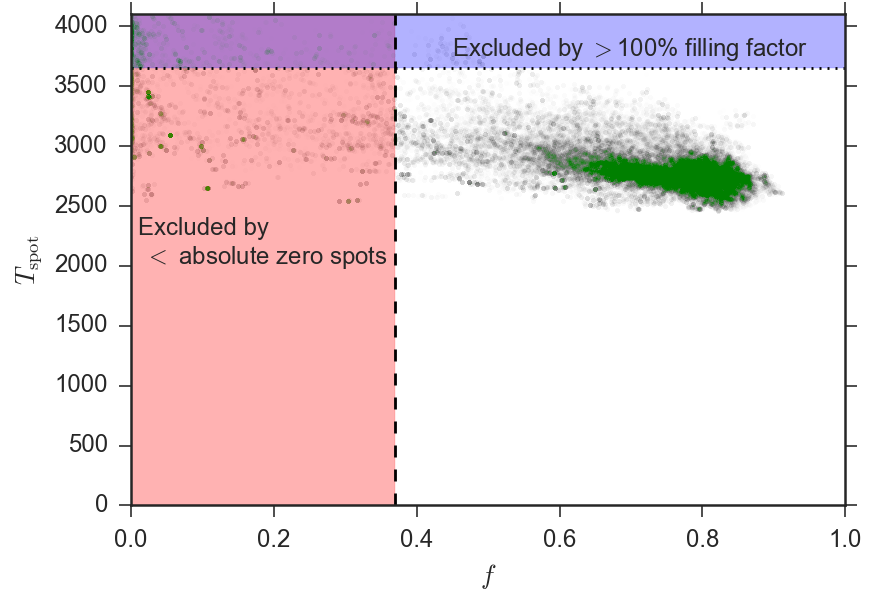

In [110]:
#plt.plot(f_spot, x_spot_2015*4100, label = '2015 Season: $\Delta V = 0.5$')
plt.vlines(0.37, 0, 4100, linestyles='dashed')
plt.hlines(3650, 0, 1, linestyles='dotted')
plt.fill_between([0, 0.37], [4100, 4100], color='r', alpha=0.3)
plt.fill_between([0, 1], [4100, 4100], [3650, 3650], color='b', alpha=0.3)
plt.xlabel('$f$')
plt.ylabel('$T_{\mathrm{spot}}$')
plt.xlim(0,1)
plt.ylim(0,4100)
plt.text(0.01, 2000, 'Excluded by \n $<$ absolute zero spots', fontsize=12)
plt.text(0.45, 3750, 'Excluded by $>$100% filling factor', fontsize=12)

plt.legend(loc='best', fontsize=10.0)

for i, group in total_vdf.groupby('m_val'):
    #print(i)
    x_spot_dat = group.Teff2/group.Teff*4100
    f_spot_dat = group.ff
    if i in ms:
        plt.plot(f_spot_dat, x_spot_dat, 'g.', alpha=0.005)



#plt.ylim(0,1)